# Inspecting BERT Vocab

In [0]:
import transformers
import torch

In [ ]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-cased')

In [0]:
vocab = dict(tokenizer.vocab)

## Vocab Analysis

- The first 999 tokens (1-indexded) are reserved, mostly of the form [unused[1]]

- Row 1000-1996 appear to be individual characters
  - They don't appear to be sorted by frequency

- The first word is "the" at position 1997
  - The words appear to be sorted by frequency after that
  - Top ~18 words are whole words, then the number 2016 is ##s, presumably the most common sub-word
  - The last whole word is 29612, "necessitated"

- Starbucks is a part of the vocabulary for some reason

### Single Characters

In [0]:
one_chars = []
one_chars_hashes = []

for token in vocab.keys():
    if len(token) == 1:
        one_chars.append(token)

    elif len(token) == 3 and token[0:2] == '##':
        one_chars_hashes.append(token)

In [25]:
print('Number of single character tokens: ', len(one_chars))

for i in range(150):
    print(one_chars[i], end=' ')

Number of single character tokens:  997
! " # $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; < = > ? @ A B C D E F G H I J K L M N O P Q R S T U V W X Y Z [ \ ] ^ _ ` a b c d e f g h i j k l m n o p q r s t u v w x y z { | } ~ ¡ ¢ £ ¥ § ¨ © ª « ¬ ® ° ± ² ³ ´ µ ¶ · ¹ º » ¼ ½ ¾ ¿ À Á Â Ä Å Æ Ç È É Í Î Ñ Ó Ö × Ø Ú Ü Þ ß à á â ã ä å æ ç è é 

In [24]:
print('Number of single character tokens with hashes: ', len(one_chars_hashes))
for i in range(150):
    print(one_chars_hashes[i], end=' ')

Number of single character tokens with hashes:  997
##s ##a ##e ##n ##d ##i ##y ##o ##r ##t ##l ##m ##h ##u ##k ##g ##1 ##2 ##3 ##4 ##6 ##7 ##0 ##5 ##9 ##z ##A ##8 ##p ##C ##c ##S ##x ##b ##T ##v ##E ##B ##R ##f ##P ##M ##D ##L ##I ##w ##N ##F ##O ##G ##K ##V ##U ##é ##W ##H ##X ##j ##Y ##q ##J ##ō ##Q ##Z ##á ##í ##ć ##° ##ó ##₂ ##à ##ā ##ū ##š ##а ##² ##ī ##₃ ##₁ ##ı ##ú ##⁺ ##ë ##₄ ##ý ##½ ##я ##ă ##ه ##α ##ي ##å ##о ##й ##н ##ü ##и ##ä ##ن ##ø ##ς ##د ##ş ##č ##₀ ##ń ##ö ##е ##³ ##ر ##ò ##р ##ł ##ₙ ##ᵢ ##ì ##ß ##ù ##ة ##ν ##ș ##ê ##− ##م ##♭ ##è ##! ##" ### ##$ ##% ##& ##' ##( ##) ##* ##+ ##, ##- ##. ##/ ##: ##; ##< ##= ##> ##? ##@ ##[ ##\ 

### Sub-words vs Whole words

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Max token length:  18


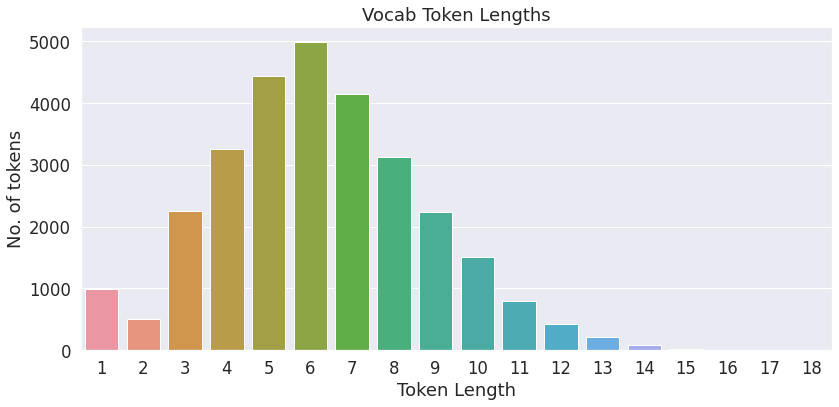

In [28]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12, 6))

token_lengths = [len(token) for token in vocab.keys()]

sns.countplot(token_lengths)
plt.title('Vocab Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('No. of tokens')
plt.tight_layout()

print('Max token length: ', max(token_lengths))

### Sub-word Analysis

In [0]:
num_subwords = 0
subword_lengths = []

for token in vocab.keys():
    if len(token) >= 2 and token[:2] == '##':
        num_subwords += 1
        length = len(token) - 2
        subword_lengths.append(length)

In [36]:
vocab_size = len(vocab.keys())
print('Number of subwords: ', num_subwords)
print('Total size of vocab: ', vocab_size)

print('Percentage of subwords in vocab: ', round((num_subwords / vocab_size)*100, 2))

Number of subwords:  6477
Total size of vocab:  28996
Percentage of subwords in vocab:  22.34


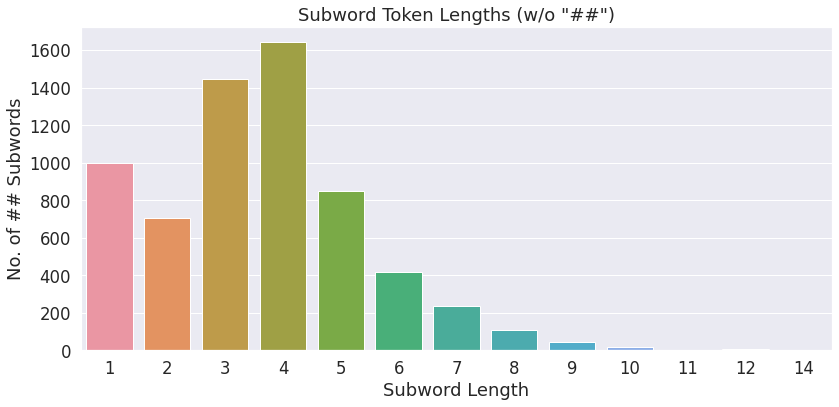

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(subword_lengths)
plt.title('Subword Token Lengths (w/o "##")')
plt.xlabel('Subword Length')
plt.ylabel('No. of ## Subwords')
plt.tight_layout()

### Number & Date Analysis

In [41]:
count = 0
for token in vocab.keys():
    if token.isdigit():
        count += 1

print('Number of numbers in vocab: ', count)

Number of numbers in vocab:  692


In [42]:
dates = 0
for i in range(1600, 2021):
    if str(i) in vocab:
        dates += 1

print('Number of dates in vocab from 1600 - 2021: ', dates)

Number of dates in vocab from 1600 - 2021:  295
